In [1]:
#Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [2]:
#We take the values of the third and fourth column,
#since we want to know the spending score of the 
#costumers, according their annual income.
datapoints = dataset.iloc[:,[3,4]].values

In [3]:
#In here, we import the hierarchical clustering from the scipy library,
#this will help us to generate the dendrogram.
import scipy.cluster.hierarchy as hc

#Also, we import the Agglomerative Clustering function from the sklearn library.
#All these imports can be done in the beggining of the code with no problem.
from sklearn.cluster import AgglomerativeClustering

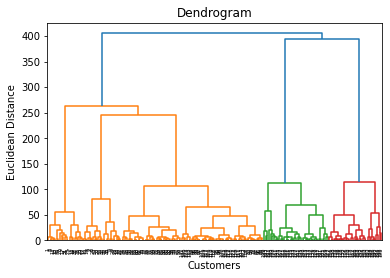

In [4]:
#We generate the dendrogram, notice that "method" parameter receives
#the method which we want to use, in this case we're using the
#ward method since there's no theoretical concerns.
dend = hc.dendrogram(hc.linkage(datapoints,method = 'ward'))

#Using the pyplot function to make a legend for our dendrogram
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [5]:
#Now, we're going to use the Agglomerative Clustering, we're going to give
#as parameters, the numbers of clusters (according to dendrogram),
#the distance computing method, and the linkage criteria.
clust = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean',linkage = 'ward')

#We're going to assign all the datapoints to a cluster
plot = clust.fit_predict(datapoints)

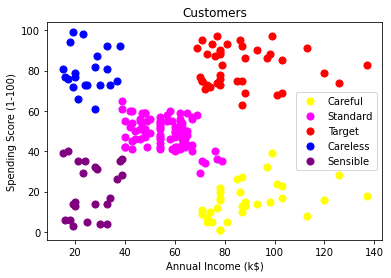

In [6]:
#Now, we're going to generate our plot, showing for each cluster the according datapoints.
#In here, we divided the customers according their spending score and their income and
#give them a label, giving a description for each type.
plt.scatter(datapoints[plot == 0,0], datapoints[plot == 0, 1], s = 50, c = 'yellow',label = 'Careful')
plt.scatter(datapoints[plot == 1,0], datapoints[plot == 1, 1], s = 50, c = 'magenta',label = 'Standard')
plt.scatter(datapoints[plot == 2,0], datapoints[plot == 2, 1], s = 50, c = 'red',label = 'Target')
plt.scatter(datapoints[plot == 3,0], datapoints[plot == 3, 1], s = 50, c = 'blue',label = 'Careless')
plt.scatter(datapoints[plot == 4,0], datapoints[plot == 4, 1], s = 50, c = 'purple',label = 'Sensible')
plt.title('Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()